<H2>課題5: Deep Learning</H2>
<p>今回の課題では手書き文字の認識をNeuralnetworkを用いて行います。</p>
<p>下記2-3にKerasから手書き文字のデータをダウンロードするコードが記載されています。</p>
<p>このデータを用いてNeuralnetworkのTrainingを行い、その後に下記のnumber_fileをTest dataとして数字の認識を実施してください。</p>
<p>8・9章で学んだ内容を踏まえ、”4. Dataの前処理”以降の各セルに'#コメント'の内容を実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [1]:
import keras
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

#追加
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


<H2> 2. Kerasよりデータを取得</H2>

<p>Kerasのデータセットは予めTraining setとTest setに分けられています。今回はそれを使用します。</p>

In [2]:
# Kerasに付属の手書き数字画像データをダウンロード
np.random.seed(0)
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

In [3]:
# Traning setのラベルを確認
labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# Training setの概要確認
#28×28ピクセルの行列
print(X_train.shape, labels_train.shape, sep='\n')

(60000, 28, 28)
(60000,)


In [5]:
# Test setの概要確認
print(X_test.shape, labels_test.shape, sep='\n')

(10000, 28, 28)
(10000,)


In [6]:
# to_categorical(y, nb_classes=None)
# クラスベクトル（0からnb_classesまでの整数）を categorical_crossentropyとともに用いるためのバイナリのクラス行列に変換します．

#引数
# y: 行列に変換するクラスベクトル
# nb_classes: 総クラス数

# 戻り値
# 入力のバイナリ行列表現

num_classes = 10



In [7]:
# 勾配更新毎のサンプル数を示す整数
batch_size = 128

# 訓練データ配列の反復回数を示す整数
epochs = 10

In [8]:
# イメージサイズ
img_rows = 28
img_cols = 28

In [9]:
# 中身の値を確認する
temp_list = []
for i in range(img_rows):
    for j in range(img_rows):
        temp_list.append(X_test[0][i][j])
        print(X_test[0][i][j])


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
84
185
159
151
60
36
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
222
254
254
254
254
241
198
198
198
198
198
198
198
198
170
52
0
0
0
0
0
0
0
0
0
0
0
0
67
114
72
114
163
227
254
225
254
254
254
250
229
254
254
140
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
17
66
14
67
67
67
59
21
236
254
106
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
83
253
209
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
233
255
83
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
129
254
238
44
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
59
249
254
62
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
133
254
187
5
0
0
0

In [10]:
print(f"Min Value : {min(temp_list)}")
print(f"Max Value : {max(temp_list)}")

Min Value : 0
Max Value : 255


<H2> 3. 画像の表示</H2>
<p>画像がどのようなものか分からないので、表示して確認します。</p>

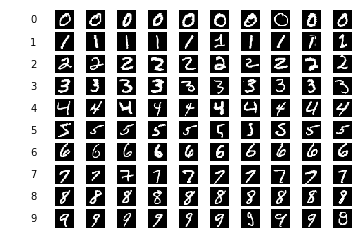

In [11]:
# Training setの画像を表示
import matplotlib.pyplot as plt
%matplotlib inline

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

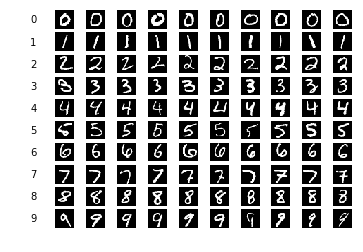

In [12]:
# Test dataの画像表示

label_images = {label: [] for label in set(labels_test.tolist())}
for x, label in zip(X_test, labels_test):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

↓課題はここから

In [13]:
# 教師データのフォーマットを確認する
X_train.shape

(60000, 28, 28)

In [14]:
# テストデータのフォーマットを確認する
X_test.shape

(10000, 28, 28)

In [15]:
# channels_first か channels_last かは$HOME/.keras/keras.json に設定されている
# この設定情報を image_data_format()でアクセスして，4次元に変換 (Tensorflowの場合は、(サンプル数、画像の行数、画像の列数、チャネル数)
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [16]:
# データをfloat32型に変換。[0,255]の値を[0.0, 1.0]に正規化
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [17]:
# 各サンプルの個数を確認
# 教師データのフォーマットを確認する
print(X_train.shape)
# テストデータのフォーマットを確認する
X_train.shape
print(X_test.shape)
print(input_shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28, 1)


In [18]:
# ラベルをone-hotベクトル（値がひとつだけ1で他が0のベクトル）に変換→Y_trainとY_testを作成
Y_train = to_categorical(labels_train, num_classes)
Y_test = to_categorical(labels_test, num_classes)

　<H2> 5. Deep learningの実施

In [19]:
# 入力層 (28, 28)
# 出力層 (10)

In [20]:
# モデルの準備
model = Sequential()

# https://keras.io/ja/

#Conv2D
# 第1引数 : カーネルの数
# 第2引数 : カーネルサイズ
# 第3引数 : 使用する活性化関数の名前
# 第4引数 : キーワード引数input_shape (今回の入力画像は28px×28pxのグレースケール画像なので、input_shape = (28,28,1)となる)
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))

# MaxPooling2D
# 第1引数 : pool_size: ダウンスケールする係数を決める 2つの整数のタプル（垂直，水平）． (2, 2) は画像をそれぞれの次元で半分にします
# pool_size=(2,2)とすると， 出力画像サイズは1/4になる
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
__________

In [21]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))

C:\Users\uv2ut\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.4302 - acc: 0.9566 - val_loss: 0.1972 - val_acc: 0.9872
Epoch 2/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.2099 - acc: 0.9872 - val_loss: 0.1122 - val_acc: 0.9902
Epoch 3/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.1411 - acc: 0.9906 - val_loss: 0.1119 - val_acc: 0.9909
Epoch 4/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.1020 - acc: 0.9932 - val_loss: 0.0901 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0770 - acc: 0.9953 - val_loss: 0.0660 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0601 - acc: 0.9962 - val_loss: 0.0539 - val_acc: 0.9932
Epoch 7/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0476 - acc: 0.9971 - val_loss: 0.0510 - val_ac

In [22]:
print(X_test.shape)
labels_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(labels_test, labels_pred))

(10000, 28, 28, 1)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [23]:
# Test dataを用いてモデルを評価（accuracyを算出）
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03130669429302216
Test accuracy: 0.9937


<H2>6. Training後のモデルを用いてnumber_file中の画像の数字を予測

In [24]:
# 必要なモジュールの読み込み
import numpy as image_np
from PIL import Image
import os

In [25]:
# 画像を取得→画像を数値に変換→数値を1行に変換→データをモデルに入れて予測→ファイル読み込んだ上でデータを判定
# MNIST の画像をファイルに保存する。
import glob
import os
from PIL import Image

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

img_dir = 'number_file'
os.makedirs(img_dir, exist_ok=True)

data_list = []

# 全画像分を保存するようにする
for data, label in zip(x_test[:x_test.shape[0]], y_test[:x_train.shape[0]]):
    data_list.append(data)
    img = Image.fromarray(data)
    # グレースケール形式で保存する。
    img.save(os.path.join(img_dir,
             'gray_{}.png'.format(label)))

    # RGB 形式で保存する。
    img = img.convert('RGB')
    img.save(os.path.join(img_dir,
             'color_{}.png'.format(label)))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
# このような形になるように変換する(10000, 28, 28, 1)
numpy_array_data = np.array(data_list)
print(numpy_array_data.shape)
print(numpy_array_data[0][0][0])

(10000, 28, 28)
0


In [27]:
for i in range(img_rows):
    for j in range(img_rows):
        print(numpy_array_data[0][i][j])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
84
185
159
151
60
36
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
222
254
254
254
254
241
198
198
198
198
198
198
198
198
170
52
0
0
0
0
0
0
0
0
0
0
0
0
67
114
72
114
163
227
254
225
254
254
254
250
229
254
254
140
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
17
66
14
67
67
67
59
21
236
254
106
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
83
253
209
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
233
255
83
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
129
254
238
44
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
59
249
254
62
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
133
254
187
5
0
0
0

In [28]:
numpy_array_data = numpy_array_data.reshape(numpy_array_data.shape[0], img_rows, img_cols, 1)

print(numpy_array_data.shape)


# データをfloat32型に変換。[0,255]の値を[0.0, 1.0]に正規化
numpy_array_data = numpy_array_data.astype('float32')

numpy_array_data = numpy_array_data / 255

(10000, 28, 28, 1)


In [29]:
for i in range(img_rows):
    for j in range(img_rows):
        print(numpy_array_data[0][i][j][0])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.32941177
0.7254902
0.62352943
0.5921569
0.23529412
0.14117648
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.87058824
0.99607843
0.99607843
0.99607

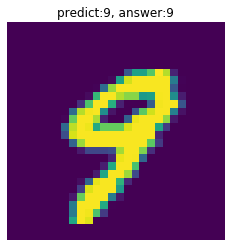

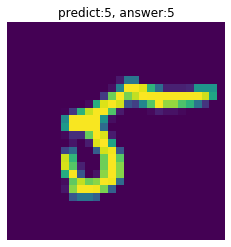

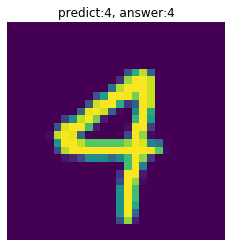

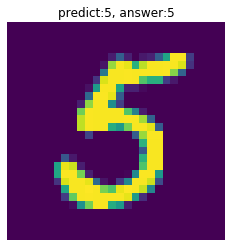

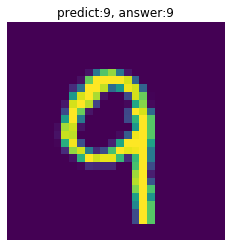

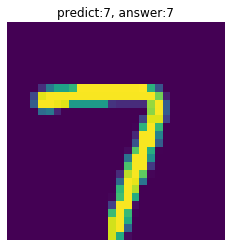

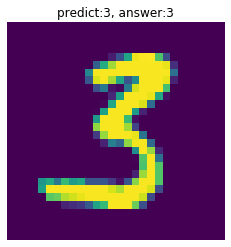

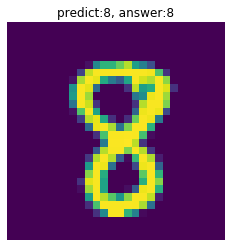

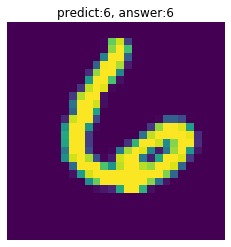

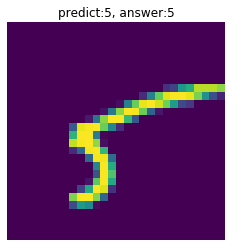

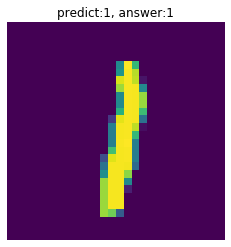

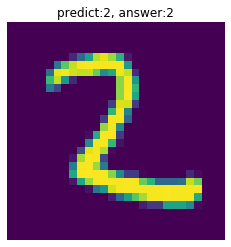

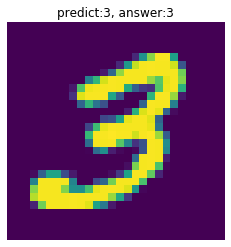

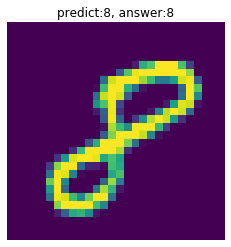

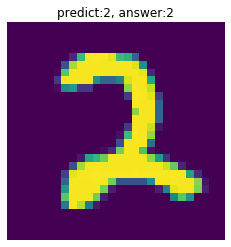

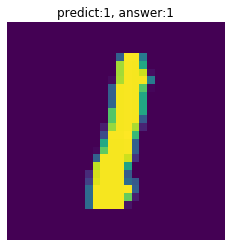

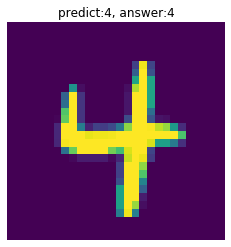

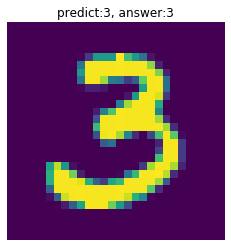

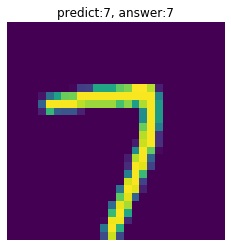

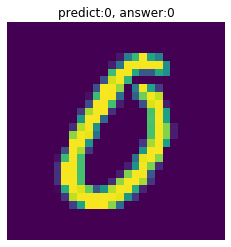

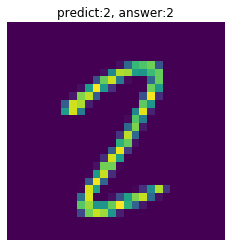

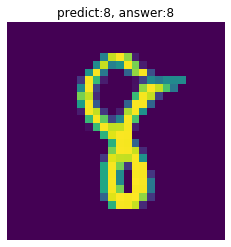

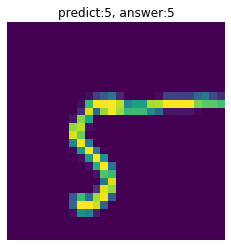

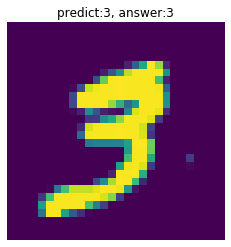

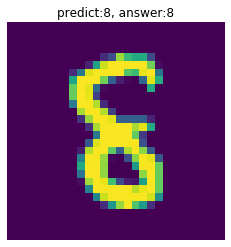

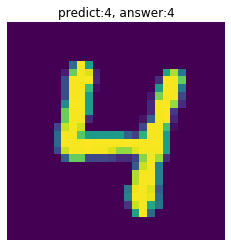

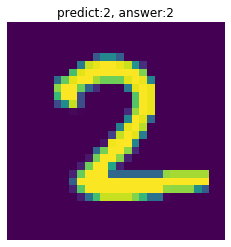

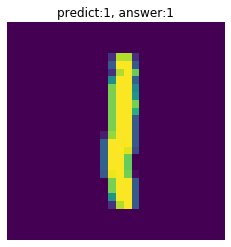

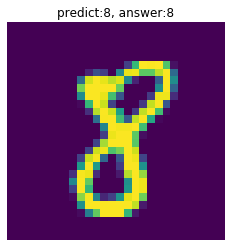

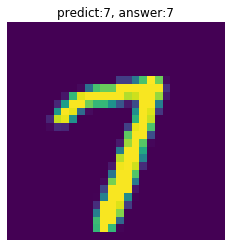

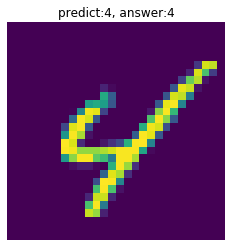

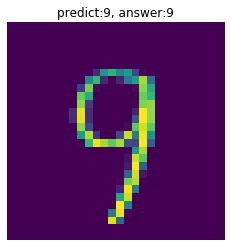

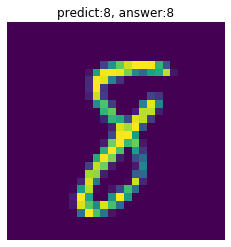

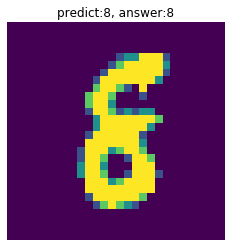

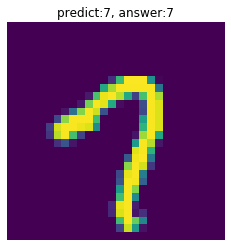

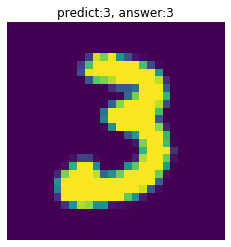

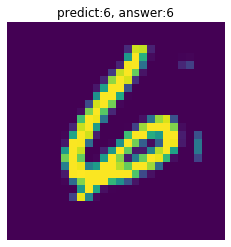

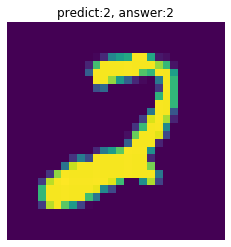

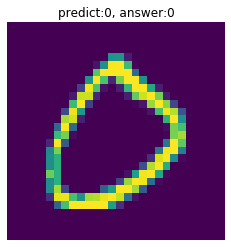

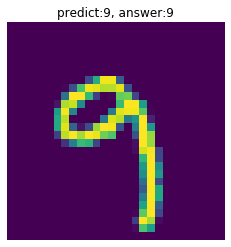

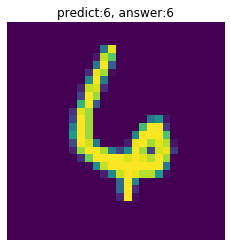

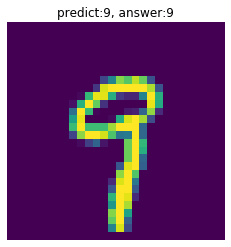

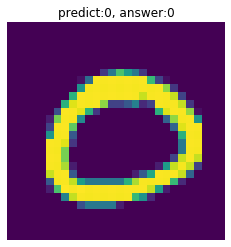

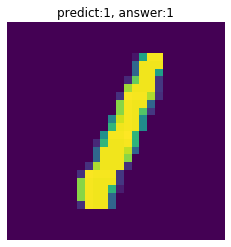

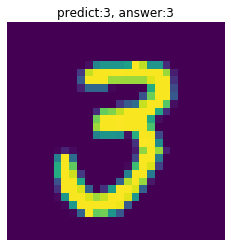

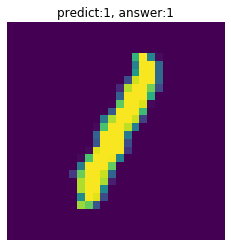

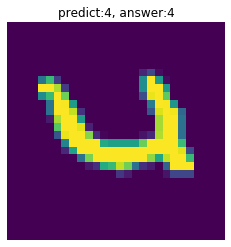

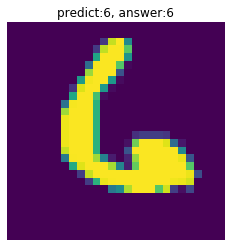

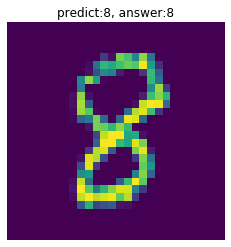

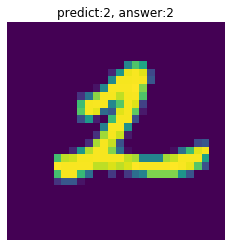

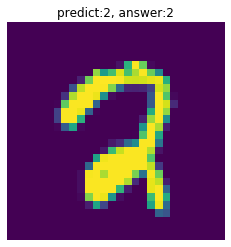

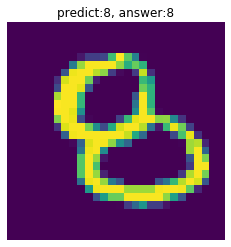

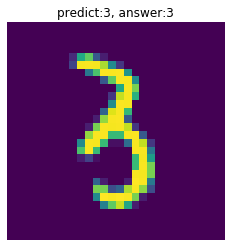

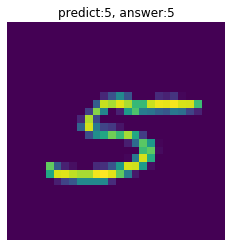

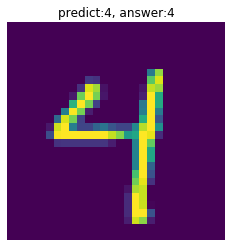

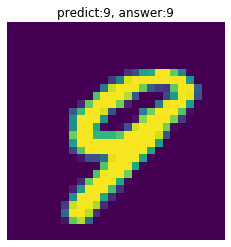

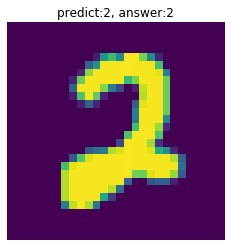

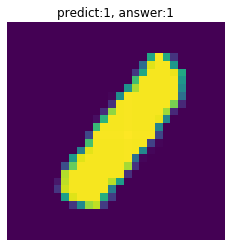

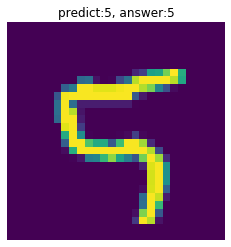

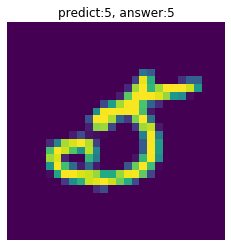

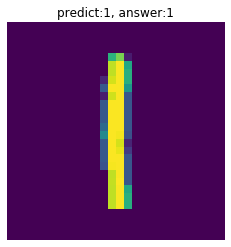

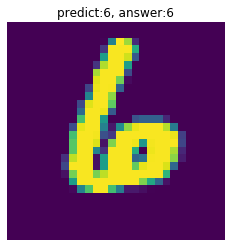

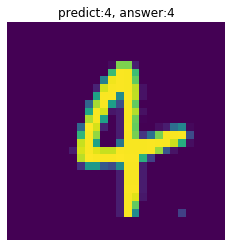

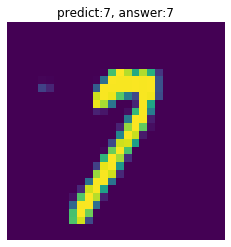

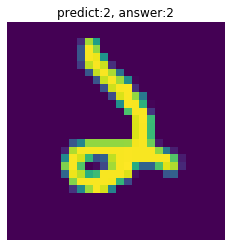

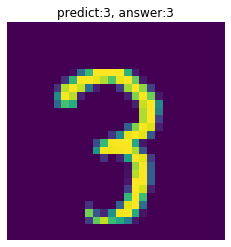

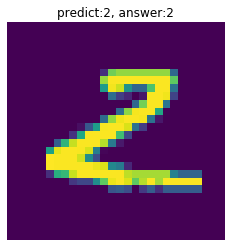

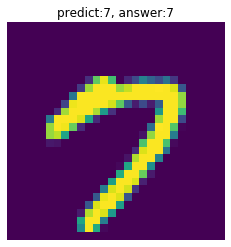

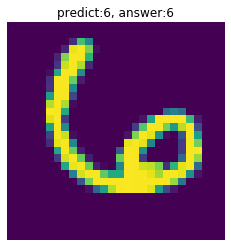

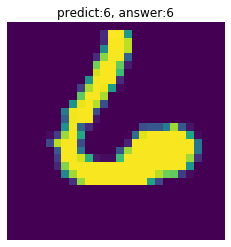

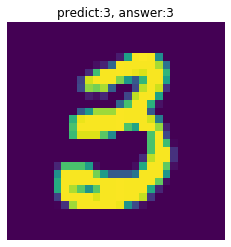

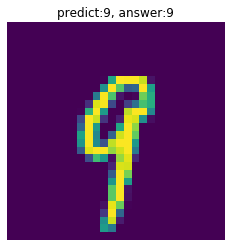

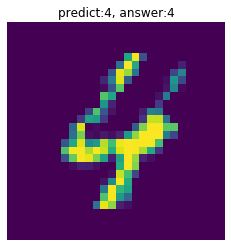

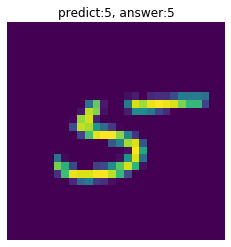

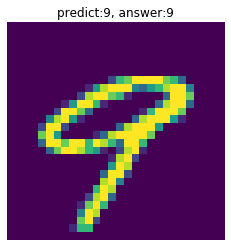

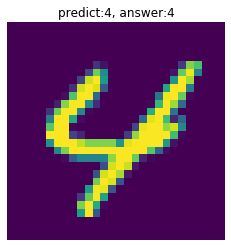

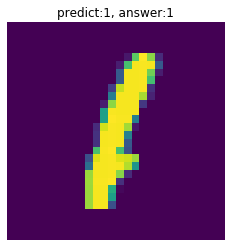

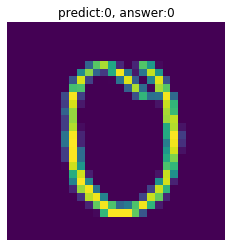

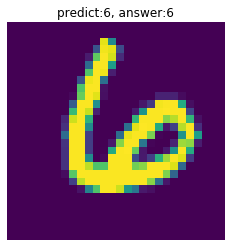

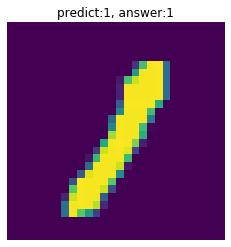

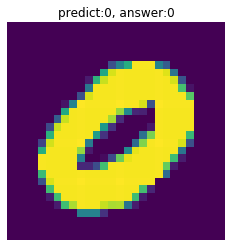

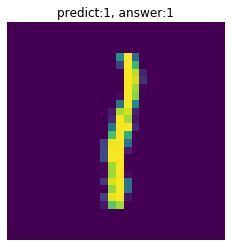

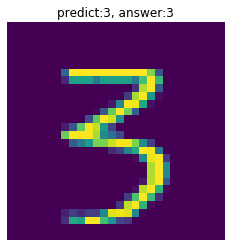

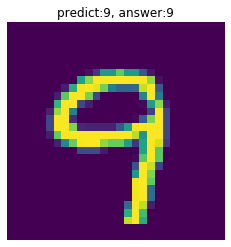

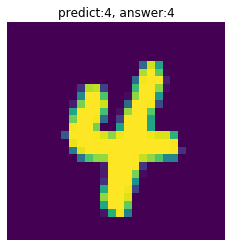

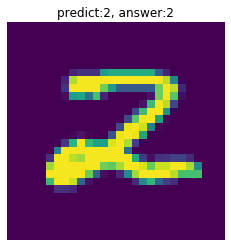

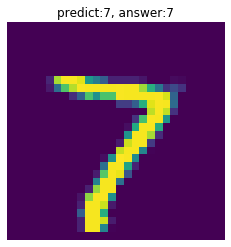

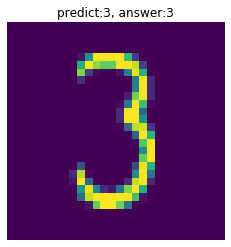

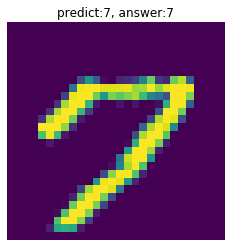

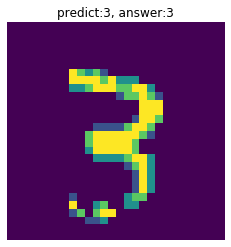

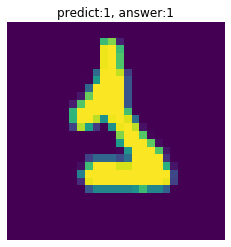

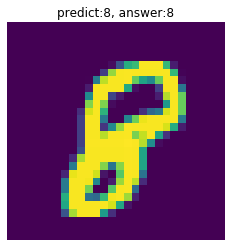

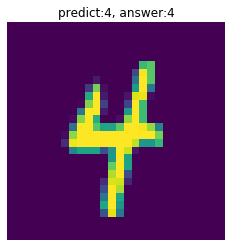

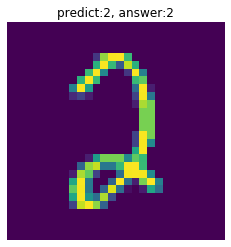

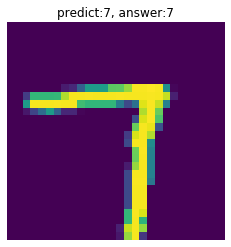

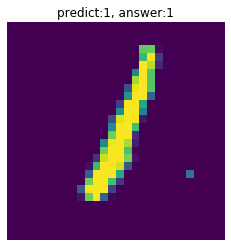

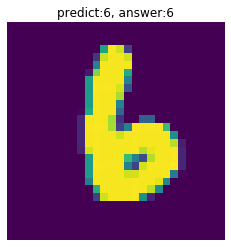

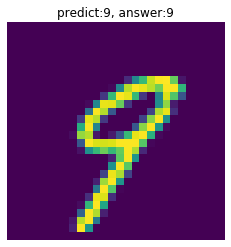

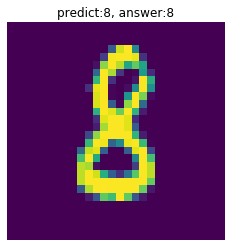

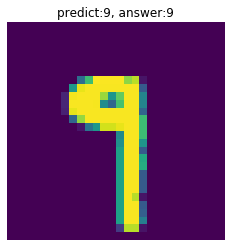

In [32]:
# predict_classesで画像のクラスを予想する
img_pred = model.predict_classes(numpy_array_data)

import matplotlib.pyplot as plt
for i in range(100):
  plt.figure()
  rand_num = np.random.randint(0, len(x_test))
  plt.imshow(x_test[rand_num])
  plt.tick_params(labelbottom='off', bottom="off")
  plt.tick_params(labelleft='off', left="off")
  plt.axis('off')
  plt.title('predict:{0}, answer:{1}'.format(img_pred[rand_num], y_test[rand_num]))
  plt.show()